In [ ]:
#referenced pandas documentation or plotly documentation for developing code.
#https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt (reached out about state code- was sent a link)
#reached out to nsch data for questions
#helped me work through the bytestring!- https://www.freecodecamp.org/news/python-bytes-to-string-how-to-convert-a-bytestring/
#https://www.interviewkickstart.com/blog/learn/adding-new-column-to-existing-dataframe-in-pandas (using .insert method)
#helped me understand that nan is a float- https://towardsdatascience.com/5-methods-to-check-for-nan-values-in-in-python-3f21ddd17eed#:~:text=NaN%20stands%20for%20Not%20A,any%20other%20type%20than%20float
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#https://stackoverflow.com/questions/73466713/unmerge-cells-when-using-groupby-pandas (unmerging groupby cells)
#nsch codebook for reference & data source is nsch!
#https://www.tutorialspoint.com/how-to-get-rows-index-names-in-pandas-dataframe (getting rownames from the dataset that correspond!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
full_data_frame = pd.read_sas('nsch_2022e_topical.sas7bdat')
#full_data_frame

In [3]:
subset_for_state_maps = full_data_frame[['FIPSST', 'SC_AGE_YEARS']]
subset_for_state_maps = subset_for_state_maps.rename(columns = {'SC_AGE_YEARS': 'child_age'})

In [4]:
#subset_for_state_maps['FIPSST'].values

In [5]:
list_code = subset_for_state_maps['FIPSST'].tolist()

In [6]:
states_as_numbers = []
for item in list_code:
    item = item.decode("utf-8")
    states_as_numbers.append(item)

In [7]:
subset_for_state_maps.insert(1, "states_as_numbers", states_as_numbers)

In [8]:
#subset_for_state_maps

In [9]:
young_flourishing_df = full_data_frame[['SC_AGE_YEARS', 'K6Q70_R', 'K6Q73_R', 'K6Q71_R', 'K6Q72_R']]
young_flourishing_df = young_flourishing_df.loc[full_data_frame['SC_AGE_YEARS'] < 6.0]
young_flourishing_df = young_flourishing_df.rename(columns = {'SC_AGE_YEARS': 'young_child_age', 'K6Q70_R': 'affectionate_child', 'K6Q73_R': 'child_bounces_back', 
                                                              'K6Q71_R': 'curious_child', 'K6Q72_R': 'child_smile_laugh'})
young_flourishing_df

,young_child_age,affectionate_child,child_bounces_back,curious_child,child_smile_laugh
0,5.0,1.0,1.0,1.0,1.0
2,5.0,1.0,2.0,1.0,1.0
5,2.0,1.0,2.0,1.0,1.0
6,0.0,1.0,1.0,1.0,1.0
8,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
54086,5.0,1.0,3.0,1.0,1.0
54089,4.0,1.0,2.0,1.0,2.0
54093,3.0,2.0,4.0,1.0,1.0
54097,2.0,2.0,2.0,2.0,2.0


In [10]:
school_age_flourishing_df = full_data_frame[['SC_AGE_YEARS', 'K6Q71_R', 'K7Q84_R', 'K7Q85_R']]
school_age_flourishing_df = school_age_flourishing_df.loc[(full_data_frame['SC_AGE_YEARS'] >= 6.0) & (full_data_frame['SC_AGE_YEARS'] < 12.0)]
school_age_flourishing_df = school_age_flourishing_df.rename(columns = {'SC_AGE_YEARS': 'age_of_school_child', 'K6Q71_R': 'curiosity_learning', 
                                                                        'K7Q84_R': 'task_completion', 'K7Q85_R': 'emotional_regulation'})
school_age_flourishing_df

,age_of_school_child,curiosity_learning,task_completion,emotional_regulation
1,8.0,1.0,3.0,3.0
3,6.0,1.0,2.0,2.0
7,8.0,1.0,2.0,1.0
12,9.0,1.0,2.0,2.0
14,6.0,2.0,2.0,3.0
...,...,...,...,...
54090,10.0,2.0,1.0,3.0
54091,6.0,1.0,1.0,1.0
54095,9.0,2.0,2.0,2.0
54099,9.0,1.0,1.0,1.0


In [11]:
teen_flourishing_df = full_data_frame[['SC_AGE_YEARS','K6Q71_R', 'K7Q84_R', 'K7Q85_R']]
teen_flourishing_df = teen_flourishing_df.loc[full_data_frame['SC_AGE_YEARS'] >= 12.0]
teen_flourishing_df = teen_flourishing_df.rename(columns = {'SC_AGE_YEARS': 'adolescent_age', 'K6Q71_R': 'curiosity_learning', 
                                                                        'K7Q84_R': 'task_completion', 'K7Q85_R': 'emotional_regulation'})
teen_flourishing_df

,adolescent_age,curiosity_learning,task_completion,emotional_regulation
4,17.0,1.0,2.0,2.0
9,12.0,2.0,1.0,2.0
10,12.0,2.0,2.0,3.0
16,17.0,2.0,2.0,2.0
17,15.0,1.0,2.0,2.0
...,...,...,...,...
54092,13.0,3.0,3.0,2.0
54094,12.0,1.0,1.0,2.0
54096,17.0,2.0,1.0,1.0
54098,13.0,2.0,2.0,2.0


In [12]:
subset_for_state_maps = subset_for_state_maps.drop(columns = ['FIPSST'])
#subset_for_state_maps

In [13]:
subset_for_state_maps = subset_for_state_maps.replace({'01' : 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 
                                                       'CO', '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', 
                                                       '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', 
                                                       '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA',
                                                       '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', 
                                                       '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', 
                                                       '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH','40': 'OK', '41': 'OR', 
                                                       '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD', 
                                                       '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', 
                                                       '54': 'WV', '55': 'WI','56': 'WY'
                            })
subset_for_state_maps = subset_for_state_maps.rename(columns = {'states_as_numbers': 'states'})
#subset_for_state_maps

In [43]:
def meets_flourishing_criteria(subset_for_state_maps, df, column_name):
    if df is young_flourishing_df:
        subset_for_state_maps = subset_for_state_maps.loc[subset_for_state_maps['child_age'] < 6.0]
    elif df is school_age_flourishing_df:
        subset_for_state_maps = subset_for_state_maps.loc[(subset_for_state_maps['child_age'] >= 6.0) & (subset_for_state_maps['child_age'] < 12.0)]
    else:
        subset_for_state_maps = subset_for_state_maps.loc[subset_for_state_maps['child_age'] >= 12.0]   
    column_to_review = df[column_name].tolist()
    flourishing_yes_no = []
    for item in column_to_review:
        if item == 1.0:
            flourishing_yes_no.append(1.0)
            #flourishing_yes_no.append('flourishing')
        elif item == 2.0:
            flourishing_yes_no.append(1.0)
            #flourishing_yes_no.append('flourishing')
        elif item == 3.0:
            flourishing_yes_no.append(0.0)
            #flourishing_yes_no.append('not_flourishing')
        elif item == 3.0:
            flourishing_yes_no.append(0.0)
            #flourishing_yes_no.append('not_flourishing') 
        else:
            flourishing_yes_no.append(float('NaN'))
    subset_for_state_maps.insert(2, column_name, flourishing_yes_no)
    subset_for_state_maps = subset_for_state_maps.dropna()
    subset_for_state_maps = subset_for_state_maps.groupby(['states'], as_index = False).mean()
    if column_name == 'affectionate_child':
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'blues', scope="usa", title = 'What percentage of young children are always or usually affectionate?')
    elif column_name == 'child_bounces_back':
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'blues', scope="usa", title = 'What percentage of young children are always or usually bounce back?')
    elif column_name == 'curious_child':
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'blues', scope="usa", title = 'What percentage of young children are always or usually curious?')
    elif column_name == 'child_smile_laugh':
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'blues', scope="usa", title = 'What percentage of young children are always or usually smiling and laughing?')   
    elif (df is school_age_flourishing_df) and (column_name == 'curiosity_learning'):
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'greens', scope="usa", title = 'What percentage of school-age children are always or usually curious?')
    elif (df is school_age_flourishing_df) and (column_name == 'task_completion'):
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'greens', scope="usa", title = 'What percentage of school-age children are always or usually completing tasks?')
    elif (df is school_age_flourishing_df) and (column_name == 'emotional_regulation'):
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'greens', scope="usa", title = 'What percentage of school-age children are always or usually successfully managing their emotions?')
    elif (df is teen_flourishing_df) and (column_name == 'curiosity_learning'):
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'purples', scope="usa", title = 'What percentage of teenagers are always or usually curious?')
    elif (df is teen_flourishing_df) and (column_name == 'task_completion'):
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'purples', scope="usa", title = 'What percentage of teenagers are always or usually completing tasks?')
    else:
        fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'purples', scope="usa", title = 'What percentage of teenagers are always or usually successfully managing their emotions?')
    fig.update_layout(title_x=0.5, margin=dict(l=20, r=20, t=40, b=20))
    return fig
#note- where 1 indicates flourishing, and 0 indicates not flourishing
#note- fix title here because it seems misleading!!

In [48]:
current_set = meets_flourishing_criteria(subset_for_state_maps, young_flourishing_df, 'child_smile_laugh')

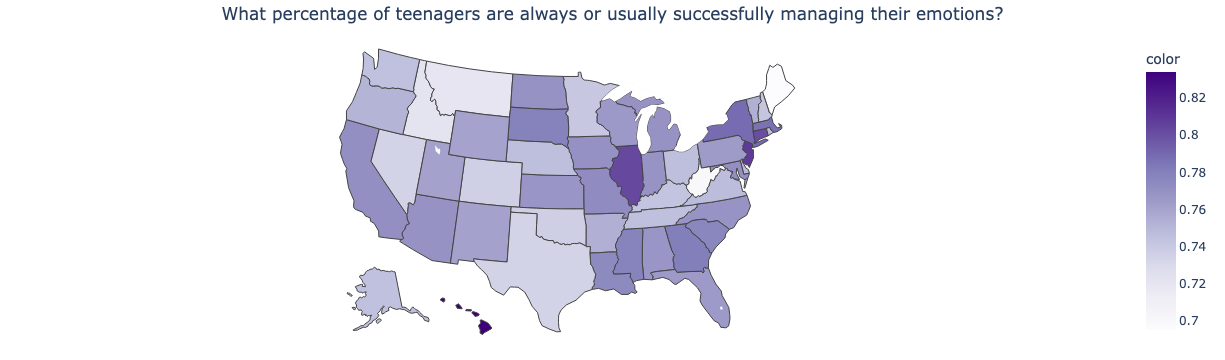

In [39]:
current_set = meets_flourishing_criteria(subset_for_state_maps, teen_flourishing_df, 'emotional_regulation')
current_set

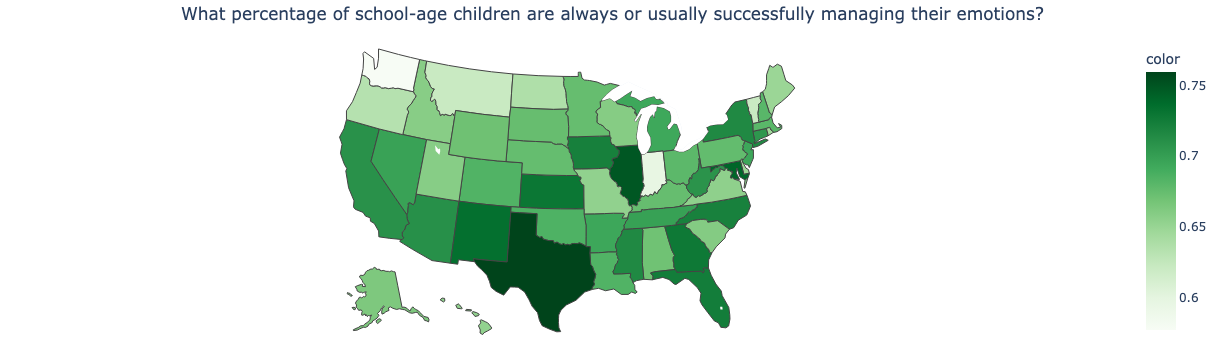

In [40]:
current_set = meets_flourishing_criteria(subset_for_state_maps, school_age_flourishing_df, 'emotional_regulation')
current_set

In [16]:
#note- include the maps that look the most interesting here!

In [ ]:
#subset_2

In [ ]:
family_health_df = full_data_frame[['SC_AGE_YEARS', 'A1_PHYSHEALTH', 'A1_RELATION', 'A1_SEX', 'A1_MENTHEALTH', 'A2_PHYSHEALTH', 'A2_RELATION', 'A2_SEX', 
                                    'A2_MENTHEALTH','K9Q40', 'K9Q41', 'VAPE', 'A1_EMPLOYED', 'A2_EMPLOYED', 'K8Q21', 'K6Q60_R', 'K6Q61_R', 'K8Q11', 
                                    'SCREENTIME', 'TALKABOUT', 'WKTOSOLVE', 'STRENGTHS', 'HOPEFUL', 'ACE1', 'ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7', 
                                    'ACE8', 'ACE9', 'ACE10', 'ACE12', 'ACE11', 'K8Q31', 'K8Q32', 'K8Q34', 'K8Q35','K8Q30', 'K6Q27','CUTHOURS', 'STOPWORK', 
                                    'AVOIDCHG', 'ATHOMEHC', 'ARRANGEHC', 'K6Q20', 'BEDTIME', 'HOURSLEEP','HOURSLEEP05', 'FOODSIT', 'K11Q60', 
                                    'K11Q61', 'K11Q62', 'S9Q34', 'EBTCARDS', 'SSI', 'SSIDISABILITY', 'MISSMORTGAGE', 'HOMEEVIC', 'PLACESLIVED', 
                                    'EVERHOMELESS', 'K6Q70_R', 'K6Q73_R', 'K6Q71_R', 'K6Q72_R', 'K7Q84_R', 'K7Q85_R']]

#subset of variables from the Child and Family Health Measures – Family Health and Activities (in the codebook).

In [ ]:
young_child_family_health_df = family_health_df.loc[family_health_df['SC_AGE_YEARS'] < 6.0]
school_age_child_family_health_df = family_health_df.loc[(family_health_df['SC_AGE_YEARS'] >= 6.0) & (family_health_df['SC_AGE_YEARS'] < 12.0)]
teen_family_health_df = family_health_df.loc[family_health_df['SC_AGE_YEARS'] >= 12.0]

In [ ]:
young_child_family_health_df = young_child_family_health_df.drop(columns = ['K8Q21', 'K7Q84_R', 'K7Q85_R', 'ACE12', 'HOURSLEEP', 'SC_AGE_YEARS'])
school_age_child_family_health_df = school_age_child_family_health_df.drop(columns = ['K6Q60_R', 'K6Q61_R', 'K6Q27', 'K6Q20',
                                                                                      'K6Q70_R', 'K6Q73_R', 'K6Q72_R', 'HOURSLEEP05', 'SC_AGE_YEARS'])
teen_family_health_df = teen_family_health_df.drop(columns = ['K6Q60_R', 'K6Q61_R', 'K6Q27', 'K6Q20',
                                                              'K6Q70_R', 'K6Q73_R', 'K6Q72_R', 'HOURSLEEP05', 'SC_AGE_YEARS'])

In [ ]:
young_child_correlation_matrix = young_child_family_health_df.corr()
school_age_child_correlation_matrix = school_age_child_family_health_df.corr()
teen_correlation_matrix = teen_family_health_df.corr()

In [ ]:
affectionate_child_family_health = young_child_correlation_matrix['K6Q70_R'].tolist()
child_bounces_back_family_health = young_child_correlation_matrix['K6Q73_R'].tolist()
curious_child_family_health = young_child_correlation_matrix['K6Q71_R'].tolist()
child_smile_laugh_family_health = young_child_correlation_matrix['K6Q72_R'].tolist()
school_age_curiosity_learning_family_health = school_age_child_correlation_matrix['K6Q71_R'].tolist()
school_age_task_completion_family_health = school_age_child_correlation_matrix['K7Q84_R'].tolist()
school_age_emotional_regulation_family_health = school_age_child_correlation_matrix['K7Q85_R'].tolist()
teen_curiosity_learning_family_health = teen_correlation_matrix['K6Q71_R'].tolist()
teen_task_completion_family_health = teen_correlation_matrix['K7Q84_R'].tolist()
teen_emotional_regulation_family_health = teen_correlation_matrix['K7Q85_R'].tolist()

In [ ]:
affectionate_child_family_health = affectionate_child_family_health[0:58]
child_bounces_back_family_health = child_bounces_back_family_health[0:58]
curious_child_family_health = curious_child_family_health[0:58]
child_smile_laugh_family_health = child_smile_laugh_family_health[0:58]
school_age_curiosity_learning_family_health = school_age_curiosity_learning_family_health[0:56]
school_age_task_completion_family_health = school_age_task_completion_family_health[0:56]
school_age_emotional_regulation_family_health = school_age_emotional_regulation_family_health[0:56]
teen_curiosity_learning_family_health = teen_curiosity_learning_family_health[0:56]
teen_task_completion_family_health = teen_task_completion_family_health[0:56]
teen_emotional_regulation_family_health = teen_emotional_regulation_family_health[0:56]

In [ ]:
child_correlation_family_health_variables = young_child_correlation_matrix.index.tolist()
school_age_or_teen_correlation_family_health_variables = school_age_child_correlation_matrix.index.tolist()

In [ ]:
def highest_correlation(column, df):
    list_set_to_use = []
    if df is young_child_correlation_matrix:
        list_set_to_use = child_correlation_family_health_variables
    #elif df is supportive_young_correlation:
     #   list_set_to_use = child_correlation_supportive_variables
    #elif (df is supportive_school_age) or (df is supportive_teenage):
     #   list_set_to_use = school_age_or_teen_correlation_supportive_variables
    else:
        list_set_to_use = school_age_or_teen_correlation_family_health_variables
    #elif df is supportive_young_correlation:
     #   list_set_to_use = child_correlation_supportive_variables
    #elif df is community_school_age_correlation:
     #   list_set_to_use = school_age_community_variables
    #elif df is community_teens_correlation:
     #   list_set_to_use = teen_community_variables
    #else:
     #   list_set_to_use = school_age_or_teen_correlation_supportive_variables
    i = 0
    highest_abs_value = 0
    actual_value = 0
    variable_name = ''        
    for item in column:
        if (np.abs(item) > highest_abs_value) and (np.abs(item) != 1.0):
            highest_abs_value = np.abs(item)
            variable_name = list_set_to_use[i]
            actual_value = item
        i += 1
    return variable_name, highest_abs_value, actual_value

In [ ]:
print(highest_correlation(teen_curiosity_learning_family_health, teen_correlation_matrix))
print(highest_correlation(teen_task_completion_family_health, teen_correlation_matrix))
print(highest_correlation(teen_emotional_regulation_family_health, teen_correlation_matrix))
print(highest_correlation(school_age_curiosity_learning_family_health, school_age_child_correlation_matrix))
print(highest_correlation(school_age_task_completion_family_health, school_age_child_correlation_matrix))
print(highest_correlation(school_age_emotional_regulation_family_health, school_age_child_correlation_matrix))
print(highest_correlation(affectionate_child_family_health, young_child_correlation_matrix))
print(highest_correlation(child_bounces_back_family_health, young_child_correlation_matrix))
print(highest_correlation(curious_child_family_health, young_child_correlation_matrix))
print(highest_correlation(child_smile_laugh_family_health, young_child_correlation_matrix))

In [ ]:
#note- if correlation value is R, this value squared would give us the % of the variation this helps to explain?
#write a model to get r squared

In [ ]:
#community involvement- too much variability in the measures and the age spread not the same that I used for fmaily health
#so- just try examining for supportive neighborhood!!
#or just to try examining for 6-17 for community involvement!!


In [ ]:
#add age variable!
#note- decided not to include individual learning items because they seemed to be limited to a) kids who were 3-5
#come back to community involvement- but how to account for 1-5?
#just examine for 6-17?
#add the flourishing variables
#drop missing values?

In [ ]:
#check if need to fix?

In [ ]:
supportive_neighborhood_young = full_data_frame[['SC_AGE_YEARS', 'K10Q30', 'K10Q31', 'GOFORHELP', 'K10Q40_R', 'K10Q11', 'K10Q12', 
                                                 'K10Q13', 'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23', 'K6Q70_R', 'K6Q73_R', 'K6Q71_R', 
                                                 'K6Q72_R']]
supportive_neighborhood_school_age_and_teens = full_data_frame[['SC_AGE_YEARS','K10Q30', 'K10Q31', 'GOFORHELP', 'K10Q40_R', 'K10Q41_R', 
                                                                'K10Q11', 'K10Q12', 'K10Q13', 'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23',
                                                                'K6Q71_R', 'K7Q84_R', 'K7Q85_R']]
supportive_young = supportive_neighborhood_young.loc[(supportive_neighborhood_school_age_and_teens['SC_AGE_YEARS'] < 6.0)]  
supportive_young = supportive_young.drop(columns = ['SC_AGE_YEARS'])
supportive_school_age = supportive_neighborhood_school_age_and_teens.loc[(supportive_neighborhood_school_age_and_teens['SC_AGE_YEARS'] >= 6.0) & (full_data_frame['SC_AGE_YEARS'] < 12.0)]
supportive_school_age = supportive_school_age.drop(columns = ['SC_AGE_YEARS'])
supportive_teenage = supportive_neighborhood_school_age_and_teens.loc[(supportive_neighborhood_school_age_and_teens['SC_AGE_YEARS'] >= 12.0)]
supportive_teenage = supportive_teenage.drop(columns = ['SC_AGE_YEARS'])
#note- examine the 40 variable because different for age groups?
                            #check same about community involvement and family?

In [ ]:
supportive_young_correlation = supportive_young.corr()
supportive_young_correlation

In [ ]:
supportive_school_age_correlation = supportive_school_age.corr()
#supportive_school_age_correlation

In [ ]:
supportive_teen_correlation = supportive_teenage.corr()
supportive_teen_correlation

In [ ]:
affectionate_child_supportive = supportive_young_correlation['K6Q70_R'].tolist()
child_bounces_back_supportive = supportive_young_correlation['K6Q73_R'].tolist()
curious_child_supportive = supportive_young_correlation['K6Q71_R'].tolist()
child_smile_laugh_supportive = supportive_young_correlation['K6Q72_R'].tolist()
school_age_curiosity_learning_supportive = supportive_school_age_correlation['K6Q71_R'].tolist()
school_age_task_completion_supportive = supportive_school_age_correlation['K7Q84_R'].tolist()
school_age_emotional_regulation_supportive = supportive_school_age_correlation['K7Q85_R'].tolist()
teen_curiosity_learning_supportive = supportive_teen_correlation['K6Q71_R'].tolist()
teen_task_completion_supportive = supportive_teen_correlation['K7Q84_R'].tolist()
teen_emotional_regulation_supportive = supportive_teen_correlation['K7Q85_R'].tolist()

In [ ]:
affectionate_child_supportive = affectionate_child_supportive[0:11]
child_bounces_back_supportive = child_bounces_back_supportive[0:11]
curious_child_supportive = curious_child_supportive[0:11]
child_smile_laugh_supportive = child_smile_laugh_supportive[0:11]
school_age_curiosity_learning_supportive = school_age_curiosity_learning_supportive[0:13]
school_age_task_completion_supportive = school_age_task_completion_supportive[0:13]
school_age_emotional_regulation_supportive = school_age_emotional_regulation_supportive[0:13]
teen_curiosity_learning_supportive = teen_curiosity_learning_supportive[0:13]
teen_task_completion_supportive = teen_task_completion_supportive[0:13]
teen_emotional_regulation_supportive = teen_emotional_regulation_supportive[0:13]

In [ ]:
child_correlation_supportive_variables = supportive_young_correlation.index.tolist()
school_age_or_teen_correlation_supportive_variables = supportive_school_age_correlation.index.tolist()

In [ ]:
print(highest_correlation(affectionate_child_supportive, supportive_young_correlation))
print(highest_correlation(child_bounces_back_supportive, supportive_young_correlation))
print(highest_correlation(curious_child_supportive, supportive_young_correlation))
print(highest_correlation(child_smile_laugh_supportive, supportive_young_correlation))
print(highest_correlation(school_age_curiosity_learning_supportive, supportive_school_age_correlation))
print(highest_correlation(school_age_task_completion_supportive, supportive_school_age_correlation))
print(highest_correlation(school_age_emotional_regulation_supportive, supportive_school_age_correlation))
print(highest_correlation(teen_curiosity_learning_supportive, supportive_teen_correlation))
print(highest_correlation(teen_task_completion_supportive, supportive_teen_correlation))
print(highest_correlation(teen_emotional_regulation_supportive, supportive_teen_correlation))

In [ ]:
community_school_age = full_data_frame[['SC_AGE_YEARS', 'K6Q15', 'SESCURRSVC', 'K6Q15', 'SESPLANYR', 'K7Q82_R', 'K7Q83_R',
                                        'GRADES', 'REPEATED', 'K7Q02R_R', 'K7Q30', 'K7Q31', 'K7Q32', 'K7Q33', 'K7Q37', 'K9Q96',
                                        'K6Q71_R', 'K7Q84_R', 'K7Q85_R']]
community_teens = full_data_frame[['SC_AGE_YEARS', 'K6Q15', 'SESCURRSVC', 'K6Q15', 'SESPLANYR', 'K7Q82_R', 'K7Q83_R',
                                        'GRADES', 'REPEATED', 'K7Q02R_R', 'K7Q30', 'K7Q31', 'K7Q32', 'K7Q33', 'K7Q37', 'K9Q96', 'K7Q38',
                                        'K6Q71_R', 'K7Q84_R', 'K7Q85_R']]
community_school_age = community_school_age.loc[(community_school_age['SC_AGE_YEARS'] >= 6.0) & (full_data_frame['SC_AGE_YEARS'] < 12.0)]
community_teens = community_teens.loc[(community_teens['SC_AGE_YEARS'] >= 12.0)]                           

In [ ]:
community_school_age_correlation = community_school_age.corr()
community_teens_correlation = community_teens.corr()

In [ ]:
community_school_age_correlation

In [ ]:
community_teens_correlation

In [ ]:
school_age_curiosity_learning_community = community_school_age_correlation['K6Q71_R'].tolist()
school_age_task_completion_community = community_school_age_correlation['K7Q84_R'].tolist()
school_age_emotional_regulation_community = community_school_age_correlation['K7Q85_R'].tolist()
teen_curiosity_learning_community = community_teens_correlation['K6Q71_R'].tolist()
teen_task_completion_community = community_teens_correlation['K7Q84_R'].tolist()
teen_emotional_regulation_community = community_teens_correlation['K7Q85_R'].tolist()

In [ ]:
school_age_curiosity_learning_community = school_age_curiosity_learning_community[0:16]
school_age_task_completion_community = school_age_task_completion_community[0:16]
school_age_emotional_regulation_community = school_age_emotional_regulation_community[0:16]
teen_curiosity_learning_community = teen_curiosity_learning_community[0:16]
teen_task_completion_community = teen_task_completion_community[0:16]
teen_emotional_regulation_community = teen_emotional_regulation_community[0:16]

In [ ]:
school_age_community_variables = community_school_age_correlation.index.tolist()
teen_community_variables = community_teens_correlation.index.tolist()

In [ ]:
print(highest_correlation(school_age_curiosity_learning_community, community_school_age_correlation))
print(highest_correlation(school_age_task_completion_community, community_school_age_correlation))
print(highest_correlation(school_age_emotional_regulation_community, community_school_age_correlation))
print(highest_correlation(teen_curiosity_learning_community, community_teens_correlation))
print(highest_correlation(teen_task_completion_community, community_teens_correlation))
print(highest_correlation(teen_emotional_regulation_community, community_teens_correlation))

In [ ]:
def create_graphs(data_frame, variable_to_examine):
    flourishing_feature = data_frame[variable_to_examine].tolist()
    value_1_count, value_2_count, value_3_count, value_4_count, missing_vals = 0, 0, 0, 0, 0
    for value in flourishing_feature:
        if value == 1.0:
            value_1_count += 1
        elif value == 2.0:
            value_2_count += 1
        elif value == 3.0:
            value_3_count += 1
        else:
            value_4_count += 1

    x_val = ['Always', 'Usually', 'Sometimes', 'Never']
    y_val = [value_1_count, value_2_count, value_3_count, value_4_count]
    fig = px.bar(x=x_val, y=y_val, text_auto = True)

    title_text = ''
    if variable_to_examine == 'affectionate_child':
        title_text = 'How often does the child show affection?'
    elif variable_to_examine == 'child_bounces_back':
        title_text = 'How often does the child bounce back after challenge?'
    elif variable_to_examine == 'curious_child':
        title_text = 'How often is the child curious?'
    elif variable_to_examine == 'child_smile_laugh':
        title_text = 'How often does the child smile and laugh?'
    elif (data_frame is school_age_flourishing_df) and (variable_to_examine == 'curiosity_learning'):
        title_text = 'How often is the school-age child curious?'
    elif (data_frame is school_age_flourishing_df) and variable_to_examine == 'task_completion':
        title_text = 'How often does the school-age child work to finish tasks they start?'
    elif (data_frame is school_age_flourishing_df) and variable_to_examine == 'emotional_regulation':
        title_text = 'How often does the school-age child have a healthy self-regulation of emotions?'
    elif (data_frame is teen_flourishing_df) and (variable_to_examine == 'curiosity_learning'):
        title_text = 'How often is the teenager curious?'
    elif (data_frame is teen_flourishing_df) and variable_to_examine == 'task_completion':
        title_text = 'How often does the teenager work to finish tasks they start?'
    else: 
        title_text = 'How often does the teenager have a healthy self-regulation of emotions?'
        #    title_text = 'How often does a child smile and laugh?'
            
    #if data_frame == adolescent_flourishing_df:
      #  if variable_to_examine == 'curiosity_learning':
      #      title_text = 'How often does the adolescent have a curiosity for learning?'
      #  elif variable_to_examine == 'task_completion':
      #      title_text = 'How often does the adolescent bounce back after challenge?'
      #  else: 
      #      title_text = 'How often does the adolescent have healthy self-regulation of emotions?'

    fig.update_layout(xaxis_title = 'Frequency', yaxis_title = 'Number of Children', 
                      title = {'text': title_text, 'x' : 0.6, 
                     'xanchor': 'right', 'yanchor': 'top'})
    fig.show()

In [ ]:
young_flourishing_df = young_flourishing_df.dropna()
school_age_flourishing_df = school_age_flourishing_df.dropna()
teen_flourishing_df = teen_flourishing_df.dropna()

In [ ]:
create_graphs(young_flourishing_df, 'curious_child')

In [ ]:
create_graphs(school_age_flourishing_df, 'curiosity_learning')

In [ ]:
create_graphs(teen_flourishing_df, 'curiosity_learning')

In [ ]:
create_graphs(school_age_flourishing_df, 'emotional_regulation')

In [ ]:
create_graphs(teen_flourishing_df, 'task_completion')

In [ ]:
#note- need to save the figures I'm looking at in screenshot form!!